#ANÁLISIS DISCRIMINANTE LINEAL


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter("ignore")
from sklearn.metrics import ConfusionMatrixDisplay,precision_score,recall_score,confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv('/content/drive/MyDrive/IA in geo/data.csv',index_col=0)
le=LabelEncoder()

In [4]:
data["cover"]=le.fit_transform(data["cover"])
data=data.sample(n = 380000)
X=data.drop(['class'],axis=1)
y=data['class']
print(X.shape)
print(y.shape)

(380000, 9)
(380000,)


In [5]:
X.columns

Index(['cover', 'slope', 'ev', 'pre', 'rad', 'soilH', '2mT', 'skinT', 'soilT'], dtype='object')

In [6]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(sampling_strategy=0.5)
X,y=rus.fit_resample(X,y)
print(X.shape)
print(y.shape)

(2376, 9)
(2376,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [8]:
X_train

,cover,slope,ev,pre,rad,soilH,2mT,skinT,soilT
2069,1,452.77615,-0.000758,1.490116e-08,6714721.5,0.198621,303.44610,305.15450,305.80988
1632,5,433.38000,-0.001072,1.322861e-03,4679788.0,0.248537,301.23505,302.47937,303.98096
1455,5,1300.98110,-0.001363,1.301060e-03,5642920.0,0.466190,299.81555,301.16406,301.77084
1554,5,475.99307,-0.000709,8.848463e-03,2335138.8,0.479850,297.59427,297.83890,298.59485
1700,1,950.34340,-0.001150,1.903510e-03,4932425.0,0.230034,300.73750,301.71088,302.39093
...,...,...,...,...,...,...,...,...,...
1469,5,2215.39200,-0.000990,4.360899e-03,4144282.8,0.389051,298.49320,298.59702,299.66156
2229,1,420.19983,-0.000774,2.616085e-05,5657328.0,0.199851,301.93650,303.57920,304.23270
2032,4,254.95486,-0.001052,5.383045e-07,6269454.5,0.213328,303.85190,304.98642,305.43454
1724,1,367.85410,-0.000966,1.490116e-08,6784558.5,0.214628,303.00980,303.88280,304.81125


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)

(1900, 1)


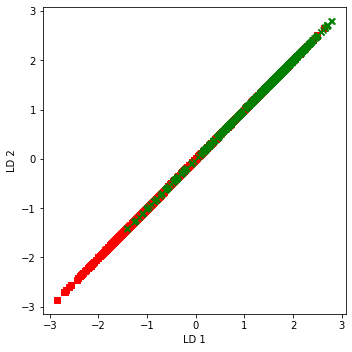

In [10]:
markers = ['s','x','o']
colors = ['r','g','b']
fig = plt.figure(figsize=(5,5))
ax0 = fig.add_subplot(111)
for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,0][y_train==l],c=c,marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.tight_layout();

In [11]:
y_pred = LDA.predict(X_test)
#calcular la probabilidad para cada clase
y_prob=LDA.predict_proba(X_test)
prob_si=LDA.predict_proba(X_test)[:,1]

Para evaluar el desempeño y capacidad de predicción utilizamos:

In [12]:
#Matriz de confusion
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[277  43]
 [ 28 128]]


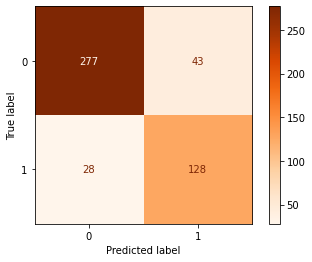

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Oranges")

In [14]:
#Exactitud del modelo
print('Accuracy de LDA para validación: {:.2f}'.format(LDA.score(X_test, y_test)))


#Reporte de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy de LDA para validación: 0.85
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       320
           1       0.75      0.82      0.78       156

    accuracy                           0.85       476
   macro avg       0.83      0.84      0.83       476
weighted avg       0.86      0.85      0.85       476



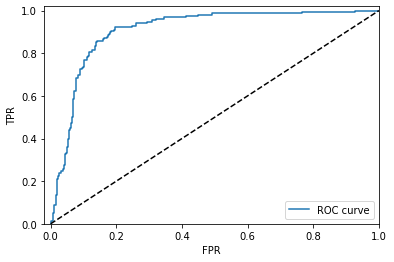

In [15]:
from sklearn.metrics import roc_curve
probs=LDA.predict_proba(X_test)
y_pred_proba = probs[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr, label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([-0.02,1.0])
plt.ylim([0.0,1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4);

Para comparar los resultados con análisis de Componentes Principales (PCA)

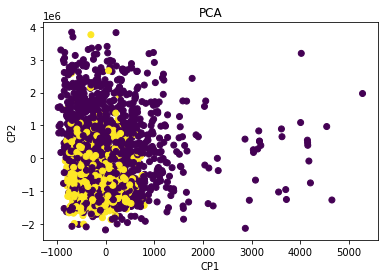

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_train) # obtener los componentes principales
X_pca=pca.transform(X_train) # convertimos nuestros datos con las nuevas dimensiones de PCA

plt.scatter(X_pca[:,1],X_pca[:,0],c=y_train)
plt.title("PCA")
plt.xlabel('CP1')
plt.ylabel('CP2')
plt.show()

La implemetacion del modelo con KFold se realiza de la siguiente manera:

In [17]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
kfold = ShuffleSplit(n_splits=5)
results = cross_val_score(LDA, X_train, y_train, cv=kfold)
print(results.mean())
print(results.std())


0.8136842105263158
0.01811015845693185


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       320
           1       0.75      0.82      0.78       156

    accuracy                           0.85       476
   macro avg       0.83      0.84      0.83       476
weighted avg       0.86      0.85      0.85       476

